In [1]:
!git clone https://github.com/sreesh05/ecen360_project.git
import pandas as pd
from google.colab import drive

Cloning into 'ecen360_project'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 30 (from 2)
Receiving objects: 100% (34/34), 233.33 MiB | 6.66 MiB/s, done.
Updating files: 100% (27/27), done.


In [2]:
import matplotlib.ticker
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from datetime import datetime
from folium.plugins import TimestampedGeoJson

In [3]:
df_2001 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2001_c20220425.csv')
df_2002 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2002_c20220425.csv')
df_2003 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2003_c20220425.csv')
df_2004 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2004_c20220425.csv')
df_2005 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2005_c20220425.csv')
df_2006 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2006_c20250122.csv')
df_2007 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2007_c20240216.csv')
df_2008 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2008_c20240620 (1).csv')
df_2009 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2009_c20231116.csv')
df_2010 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2010_c20220425.csv')
df_2011 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2011_c20230417.csv')
df_2012 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2012_c20221216.csv')
df_2013 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2013_c20230118.csv')
df_2014 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2014_c20231116.csv')
df_2015 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2015_c20240716.csv')
df_2016 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2016_c20220719.csv')
df_2017 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2017_c20250122.csv')
df_2018 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2018_c20240716.csv')
df_2019 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2019_c20240117.csv')
df_2020 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2020_c20240620.csv')
df_2021 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2021_c20240716.csv')
df_2022 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2022_c20241121.csv')
df_2023 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2023_c20250216.csv')
df_2024 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2024_c20250216.csv')
dfs = [
    df_2001, df_2002, df_2003, df_2004, df_2005, df_2006,
    df_2007, df_2008, df_2009, df_2010, df_2011, df_2012,
    df_2013, df_2014, df_2015, df_2016, df_2017, df_2018,
    df_2019, df_2020, df_2021, df_2022, df_2023, df_2024
]

# Combine them into one big DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df.head()


<ipython-input-3-dd5e1356598d>:6: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2006 = pd.read_csv('ecen360_project/StormEvents_details-ftp_v1.0_d2006_c20250122.csv')


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200111,28,600,200111,29,1800,1124964,5274875,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late on the 26th and on the 27th an arctic col...,Cooperative observer reported one inch of snow.,PDS
1,200110,24,1925,200110,24,1925,1125328,5274950,LAKE ERIE,95.0,...,NaN,NaN,STONY POINT,NaN,NaN,NaN,NaN,"See Michigan, East for more on this event.",A storm spotter reported winds in excess of 45...,PDS
2,200112,1,900,200112,1,1800,1125247,5275049,NEW JERSEY,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge of high pressure over the weste...,NaN,PDS
3,200111,29,600,200111,29,1800,1124964,5274877,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late on the 26th and on the 27th an arctic col...,A mixture of freezing rain and sleet made brid...,PDS
4,200111,15,800,200111,30,800,1125105,5274892,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The South Carolina Drought Response Committee ...,PDS


In [4]:
#cleaning data: converting the symbols to numbers
def convert_damage(val):
    if pd.isna(val) or val.strip() == '':
        return 0
    val = val.strip().upper()
    try:
        if val.endswith('K'):
            return float(val[:-1]) * 1_000 # convert k to a 1000
        elif val.endswith('M'):
            return float(val[:-1]) * 1_000_000 # convert M to 1,000,000
        elif val.endswith('B'):
            return float(val[:-1]) * 1_000_000_000
        else:
            return float(val)
    except ValueError:
        return 0  # fallback for weird edge cases


combined_df['DAMAGE_PROPERTY'] = combined_df['DAMAGE_PROPERTY'].apply(convert_damage)
combined_df['DAMAGE_CROPS'] = combined_df['DAMAGE_CROPS'].apply(convert_damage)
combined_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200111,28,600,200111,29,1800,1124964,5274875,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late on the 26th and on the 27th an arctic col...,Cooperative observer reported one inch of snow.,PDS
1,200110,24,1925,200110,24,1925,1125328,5274950,LAKE ERIE,95.0,...,NaN,NaN,STONY POINT,NaN,NaN,NaN,NaN,"See Michigan, East for more on this event.",A storm spotter reported winds in excess of 45...,PDS
2,200112,1,900,200112,1,1800,1125247,5275049,NEW JERSEY,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge of high pressure over the weste...,NaN,PDS
3,200111,29,600,200111,29,1800,1124964,5274877,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late on the 26th and on the 27th an arctic col...,A mixture of freezing rain and sleet made brid...,PDS
4,200111,15,800,200111,30,800,1125105,5274892,SOUTH CAROLINA,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The South Carolina Drought Response Committee ...,PDS


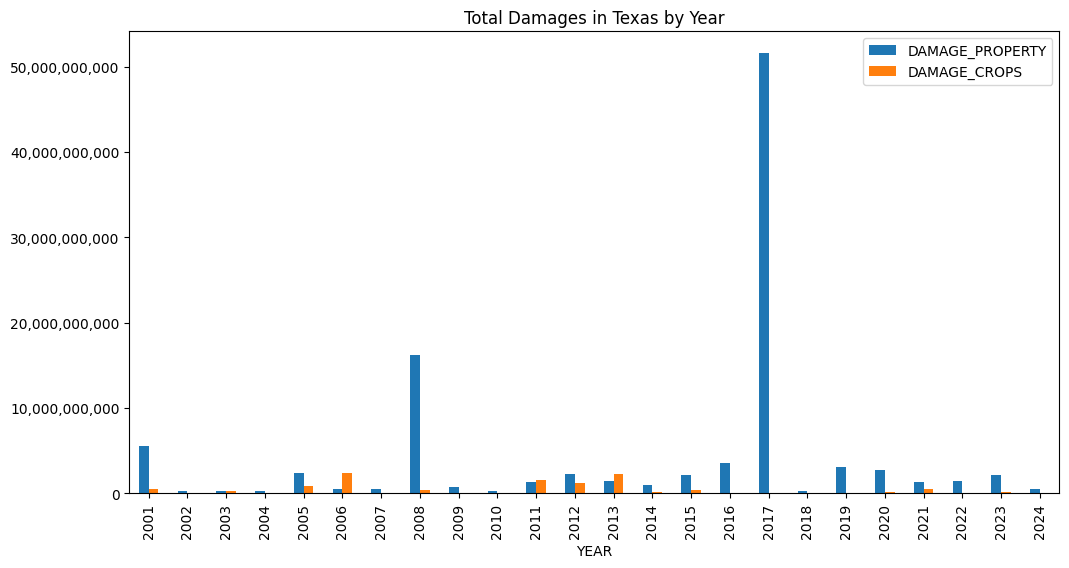

In [5]:
#damage by year in texas
damage_by_year = combined_df[combined_df["STATE"]=="TEXAS"].groupby("YEAR")[["DAMAGE_PROPERTY", "DAMAGE_CROPS"]].sum()
ax = damage_by_year.plot(kind='bar', figsize=(12, 6), title='Total Damages in Texas by Year')
# Format y-axis labels to display full numbers
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

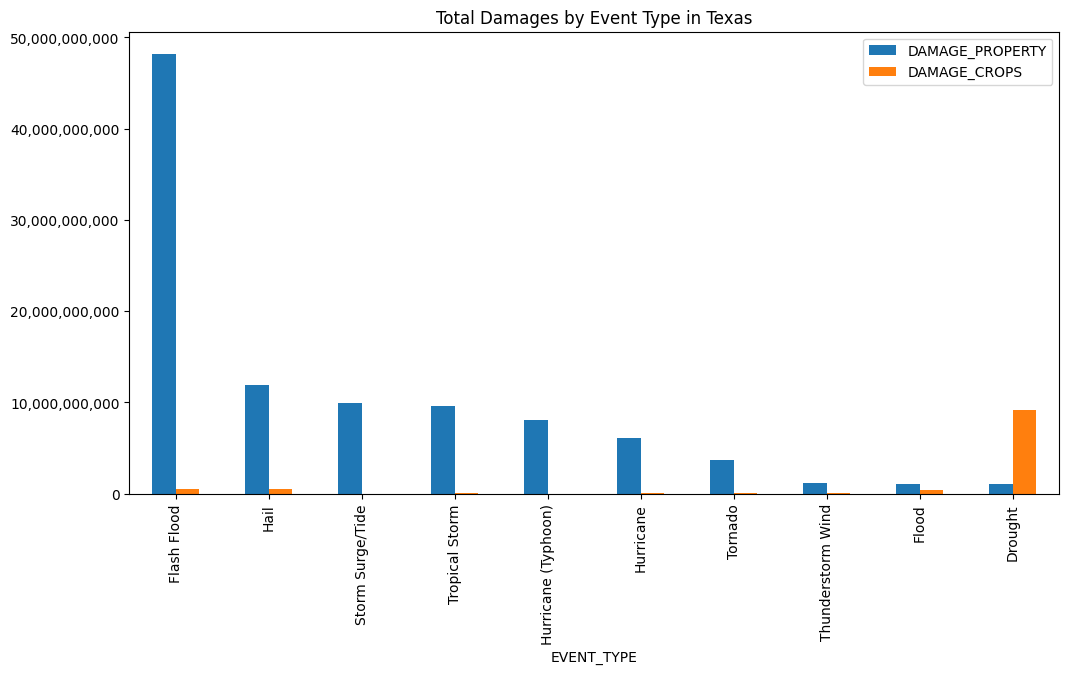

In [6]:
#events that cost the highest damages in texas
damage_by_event =  combined_df[combined_df["STATE"]=="TEXAS"].groupby("EVENT_TYPE")[["DAMAGE_PROPERTY", "DAMAGE_CROPS"]].sum()
damage_by_event.sort_values(by="DAMAGE_PROPERTY", ascending=False, inplace=True)
ax = damage_by_event.head(10).plot(kind='bar', figsize=(12, 6), title='Total Damages by Event Type in Texas')

# Format y-axis labels to display full numbers
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<Axes: title={'center': 'Top 10 Costliest Event Types in Texas'}, ylabel='EVENT_TYPE'>

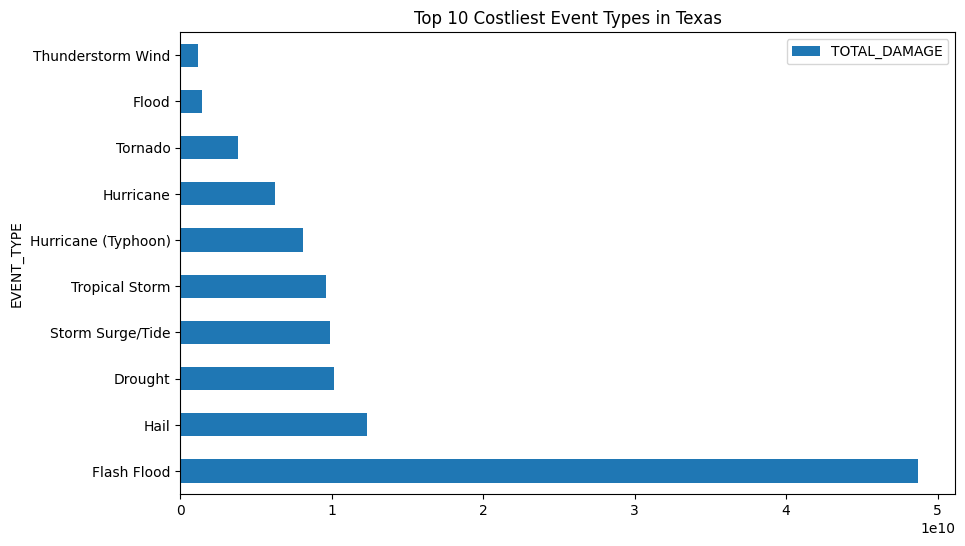

In [7]:
event_damage = combined_df[combined_df["STATE"]=="TEXAS"].groupby('EVENT_TYPE')[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].sum()
event_damage['TOTAL_DAMAGE'] = event_damage['DAMAGE_PROPERTY'] + event_damage['DAMAGE_CROPS']
top_events = event_damage.sort_values('TOTAL_DAMAGE', ascending=False).head(10)
top_events[['TOTAL_DAMAGE']].plot(kind='barh', figsize=(10, 6), title='Top 10 Costliest Event Types in Texas')



<ipython-input-8-799affe57379>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tx['MONTH'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME']).dt.month


<Axes: title={'center': 'Monthly Property Damage Trend in Texas'}, xlabel='MONTH'>

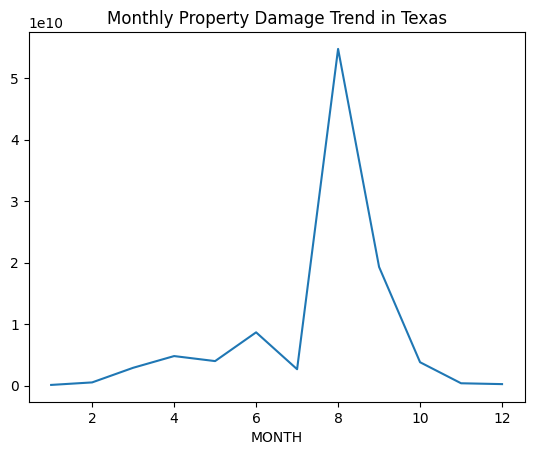

In [8]:
#seasonality
df_tx = combined_df[combined_df['STATE'] == 'TEXAS'].copy()

df_tx['MONTH'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME']).dt.month
df_tx.groupby('MONTH')['DAMAGE_PROPERTY'].sum().plot(kind='line', title='Monthly Property Damage Trend in Texas')

<ipython-input-9-8e7194e77cea>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tx['MONTH'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME']).dt.month


<Axes: title={'center': 'Monthly Crop Damage Trend in Texas'}, xlabel='MONTH'>

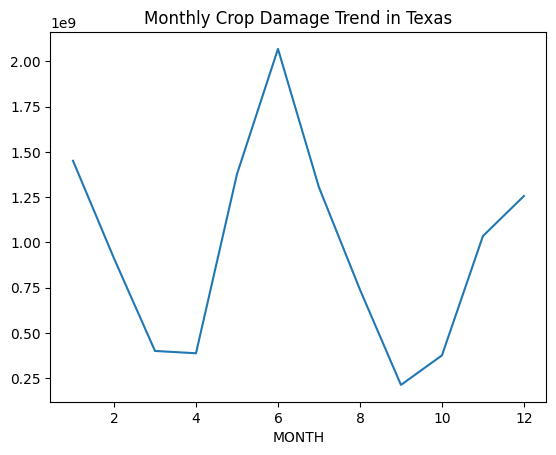

In [9]:
#seasonality
df_tx = combined_df[combined_df['STATE'] == 'TEXAS'].copy()

df_tx['MONTH'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME']).dt.month
df_tx.groupby('MONTH')['DAMAGE_CROPS'].sum().plot(kind='line', title='Monthly Crop Damage Trend in Texas')

In [10]:
# --------- FILTER TEXAS DATA ---------
df_tx = combined_df[combined_df['STATE'] == 'TEXAS'].copy()
df_tx = df_tx.dropna(subset=['BEGIN_LAT', 'BEGIN_LON'])

# Parse proper datetime
df_tx['BEGIN_DATE_TIME'] = pd.to_datetime(
    df_tx['BEGIN_YEARMONTH'].astype(str) + df_tx['BEGIN_DAY'].astype(str).str.zfill(2),
    format='%Y%m%d', errors='coerce'
)
df_tx = df_tx.dropna(subset=['BEGIN_DATE_TIME'])

# Filter for years 2010–2024
df_tx = df_tx[(df_tx['BEGIN_DATE_TIME'].dt.year >= 2010) & (df_tx['BEGIN_DATE_TIME'].dt.year <= 2024)]

# Fill missing damage values and compute total
df_tx['DAMAGE_PROPERTY'] = df_tx['DAMAGE_PROPERTY'].fillna(0)
df_tx['DAMAGE_CROPS'] = df_tx['DAMAGE_CROPS'].fillna(0)
df_tx['TOTAL_DAMAGE'] = df_tx['DAMAGE_PROPERTY'] + df_tx['DAMAGE_CROPS']

# --------- TOP 100 DAMAGING EVENTS PER YEAR ---------
df_tx['YEAR'] = df_tx['BEGIN_DATE_TIME'].dt.year
df_top = df_tx.groupby('YEAR', group_keys=False).apply(lambda g: g.nlargest(100, 'TOTAL_DAMAGE')).reset_index(drop=True)

# Set full datetime for animation
df_top['ANIMATION_TIME'] = df_top['BEGIN_DATE_TIME']

# --------- COLORS ---------
# Get unique event types from your data
event_types = df_top['EVENT_TYPE'].unique().tolist()
# Or, if you want to restrict to certain types:
# event_types = df_top['EVENT_TYPE'].unique().tolist()
# event_types = [et for et in event_types if et in ['Flash Flood', 'Flood', 'Hail', 'Thunderstorm Wind']]

palette = sns.color_palette("tab10", len(event_types)).as_hex()
event_colors = dict(zip(event_types, palette))

# --------- BUILD GEOJSON FEATURES ---------
features = []
for _, row in df_top.iterrows():
    # Handle cases where the event type is not in event_colors
    fill_color = event_colors.get(row['EVENT_TYPE'], '#808080') # Default to gray if not found

    features.append({
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['BEGIN_LON'], row['BEGIN_LAT']],
        },
        'properties': {
            'time': row['ANIMATION_TIME'].strftime('%Y-%m-%dT%H:%M:%S'),
            'popup': f"{row['EVENT_TYPE']}<br>${row['TOTAL_DAMAGE']:,.0f}",
            'icon': 'circle',
            'iconstyle': {
                'fillColor': fill_color,  # Use fill_color here
                'fillOpacity': 0.7,
                'radius': 5,
                'stroke': True
            },
            'style': {
                'color': fill_color # Use fill_color here
            }
        }
    })

# --------- MAP ---------
m = folium.Map(location=[31.0, -99.0], zoom_start=6)

TimestampedGeoJson(
    {
        'type': 'FeatureCollection',
        'features': features
    },
    period='P1Y',  # yearly animation
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM',
    time_slider_drag_update=True,
).add_to(m)

# --------- LEGEND ---------
legend_html = """
<div style="position: fixed;
     bottom: 30px; left: 30px; width: 250px; height: auto;
     background-color: white; z-index:9999; padding: 10px;
     box-shadow: 2px 2px 5px rgba(0,0,0,0.4); font-size:14px;">
     <b>Event Type Legend</b><br>
"""
for event, color in event_colors.items():
    legend_html += f'<div style="margin-bottom:5px;"><span style="background-color:{color};width:12px;height:12px;display:inline-block;margin-right:6px;"></span>{event}</div>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))

# --------- DISPLAY MAP ---------
m



<ipython-input-10-257fc96ff9fd>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top = df_tx.groupby('YEAR', group_keys=False).apply(lambda g: g.nlargest(100, 'TOTAL_DAMAGE')).reset_index(drop=True)


In [11]:
# Ensure BEGIN_DATE_TIME is datetime
combined_df["BEGIN_DATE_TIME"] = pd.to_datetime(combined_df["BEGIN_DATE_TIME"], errors='coerce')

# Filter for valid Texas rows
texas_df = combined_df[
    (combined_df["STATE"] == "TEXAS") &
    (combined_df["BEGIN_DATE_TIME"].notna()) &
    (combined_df["BEGIN_LAT"].notna()) &
    (combined_df["BEGIN_LON"].notna()) &
    (combined_df["EVENT_TYPE"].notna())
].copy()

# Extract month, year, and assign seasons
texas_df["month"] = texas_df["BEGIN_DATE_TIME"].dt.month
texas_df["year"] = texas_df["BEGIN_DATE_TIME"].dt.year

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

texas_df["season"] = texas_df["month"].apply(get_season)

# Final ML-friendly DataFrame
ml_df = texas_df[[
    "EVENT_TYPE", "BEGIN_LAT", "BEGIN_LON", "month", "season", "year",
    "DAMAGE_PROPERTY", "DAMAGE_CROPS"
]].copy()

ml_df.head()


<ipython-input-11-8fdd59d3a558>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df["BEGIN_DATE_TIME"] = pd.to_datetime(combined_df["BEGIN_DATE_TIME"], errors='coerce')


,EVENT_TYPE,BEGIN_LAT,BEGIN_LON,month,season,year,DAMAGE_PROPERTY,DAMAGE_CROPS
22,Thunderstorm Wind,30.93333,-97.53333,11,Fall,2001,25000.0,0.0
31,Hail,32.65000,-98.90000,11,Fall,2001,0.0,0.0
76,Thunderstorm Wind,33.51667,-96.18333,11,Fall,2001,5000.0,0.0
603,Thunderstorm Wind,30.68333,-94.18333,12,Winter,2001,20000.0,0.0
604,Thunderstorm Wind,30.65000,-93.91667,12,Winter,2001,25000.0,0.0


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Encode categorical columns
ml_df["season_encoded"] = LabelEncoder().fit_transform(ml_df["season"])
event_encoder = LabelEncoder()
ml_df["event_encoded"] = event_encoder.fit_transform(ml_df["EVENT_TYPE"])

# Log scale and fill damage columns
ml_df["DAMAGE_PROPERTY"] = ml_df["DAMAGE_PROPERTY"].fillna(0).apply(lambda x: np.log1p(x))
ml_df["DAMAGE_CROPS"] = ml_df["DAMAGE_CROPS"].fillna(0).apply(lambda x: np.log1p(x))

# Features and target
X = ml_df[[
    "BEGIN_LAT", "BEGIN_LON", "month", "season_encoded", "year",
    "DAMAGE_PROPERTY", "DAMAGE_CROPS"
]]
y = ml_df["event_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier
model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(event_encoder.classes_),
    eval_metric="mlogloss",
    use_label_encoder=False,
    scale_pos_weight=1,
    max_depth=8,
    learning_rate=0.1,
    n_estimators=200,
    verbosity=1
)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
present_labels = np.unique(y_test)
target_names = event_encoder.inverse_transform(present_labels)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=present_labels, target_names=target_names))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:

                   precision    recall  f1-score   support

          Drought       0.00      0.00      0.00         1
       Dust Devil       0.00      0.00      0.00         3
       Dust Storm       0.00      0.00      0.00         1
      Flash Flood       0.64      0.54      0.59      1554
            Flood       0.56      0.19      0.28       246
     Funnel Cloud       0.39      0.16      0.23        87
             Hail       0.72      0.86      0.79      6316
       Heavy Rain       0.61      0.26      0.36       104
        High Wind       0.00      0.00      0.00         1
        Lightning       0.40      0.08      0.14       119
Thunderstorm Wind       0.65      0.63      0.64      4006
          Tornado       0.59      0.21      0.31       622

         accuracy                           0.69     13060
        macro avg       0.38      0.24      0.28     13060
     weighted avg       0.68      0.69      0.67     13060



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
import pandas as pd

# Get test set locations and season
X_test_coords = X_test.copy()
X_test_coords["lat"] = ml_df.loc[X_test.index, "BEGIN_LAT"]
X_test_coords["lon"] = ml_df.loc[X_test.index, "BEGIN_LON"]
X_test_coords["season"] = ml_df.loc[X_test.index, "season"]
X_test_coords["true_event"] = event_encoder.inverse_transform(y_test)
X_test_coords["predicted_event"] = event_encoder.inverse_transform(y_pred)

# Clean: Remove rows with missing/invalid coordinates
X_test_coords = X_test_coords.dropna(subset=["lat", "lon"])



In [19]:
import plotly.express as px

color_map = {
    "Flood": "blue",
    "Flash Flood": "orange",
    "Hail": "green",
    "Tornado": "red",
    "Thunderstorm Wind": "purple",
    "Lightning": "brown",
    "Heavy Rain": "pink"
}

key_events = list(color_map.keys())
X_filtered = X_test_coords[X_test_coords["predicted_event"].isin(key_events)]

fig = px.scatter_mapbox(
    X_filtered,
    lat="lat",
    lon="lon",
    color="predicted_event",
    color_discrete_map=color_map,
    hover_name="predicted_event",
    hover_data=["season", "true_event"],
    mapbox_style="carto-positron",
    zoom=4.5,
    center={"lat": 31, "lon": -99},
    height=700,
    title="Predicted Storm Events Across Texas (Colored by Event)"
)

fig.show()


In [20]:
fig = px.scatter_mapbox(
    X_filtered,
    lat="lat",
    lon="lon",
    color="predicted_event",
    animation_frame="season",
    color_discrete_map=color_map,
    hover_name="predicted_event",
    hover_data=["true_event"],
    mapbox_style="carto-positron",
    zoom=4.5,
    center={"lat": 31, "lon": -99},
    height=700,
    title="Predicted Storm Events by Season (Texas)"
)

fig.show()
